In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

import spacy
from textblob import TextBlob


df = pd.read_csv("Emotion_final.csv")
pd.set_option('display.max_columns', None)  

c:\Users\impej\miniconda3\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\impej\AppData\Roaming\Python\Python310\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [37]:
df.head(n=40)


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,happy
9,i feel romantic too,love


In [3]:
spacy.load("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")


### 1  étudier la répartition des textes par émotions


In [4]:
df['Emotion'].unique()


array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

In [5]:
# df['Sentiment'] = df['Text'].apply(lambda text: TextBlob(text).sentiment.polarity)

sentiment_counts = df.groupby('Emotion')['Text'].count()
# sentiment_means = df.groupby('Emotion')['Sentiment'].mean()

print(sentiment_counts)
# print(sentiment_means)

Emotion
anger       2993
fear        2652
happy       7029
love        1641
sadness     6265
surprise     879
Name: Text, dtype: int64


### 2  identifiez quels mots sont susceptibles d'être des stopword


In [38]:
stopwords = nlp.Defaults.stop_words

print(stopwords)

{'yours', 'however', 'even', '‘s', 'all', 'thereafter', "'ve", 'side', 'has', 'off', 'where', 'ca', 'ourselves', 'else', '’m', 'therefore', 'name', '’re', 'former', 'part', 'since', 'formerly', '‘d', 'front', 'because', 'so', 'alone', 'when', 'again', 'whatever', 'once', 'upon', 'is', 'much', 'thus', 'few', 'thereupon', 'herself', 'his', 'using', 'already', 'everyone', 'whence', 'below', 'hereupon', 'someone', 'quite', 'bottom', 'hers', 'whoever', 'amount', 'whole', 'up', 'should', 'their', 'into', 'we', 'will', 'latter', 'being', 'whom', 'by', 'indeed', 'back', 'her', 'elsewhere', 'were', 'make', 'out', 'its', 'them', 'those', 'you', 'besides', 'enough', 'move', 'who', 'six', 'per', 'until', 'three', 'was', 'nevertheless', 'latterly', 'might', 'can', 'have', 'may', 'hundred', 'whither', 'two', 'i', '‘re', 'against', 'doing', 'hereafter', 'yourself', 'ours', 'nine', 'throughout', 'most', 'either', 'none', 'made', 'afterwards', 'various', 'get', 'fifteen', 'really', 'this', 'whereas', '

In [39]:
import spacy

nlp = spacy.load("en_core_web_sm")

def get_stopwords(text):
    doc = nlp(text)
    stopwords = [token.text for token in doc if token.is_stop and len(token.text) > 1]
    return stopwords

df['Stopwords'] = df['Text'].apply(get_stopwords)

print(df)


                                                    Text  Emotion  \
0                                i didnt feel humiliated  sadness   
1      i can go from feeling so hopeless to so damned...  sadness   
2       im grabbing a minute to post i feel greedy wrong    anger   
3      i am ever feeling nostalgic about the fireplac...     love   
4                                   i am feeling grouchy    anger   
...                                                  ...      ...   
21454               Melissa stared at her friend in dism     fear   
21455  Successive state elections have seen the gover...     fear   
21456               Vincent was irritated but not dismay     fear   
21457  Kendall-Hume turned back to face the dismayed ...     fear   
21458                    I am dismayed , but not surpris     fear   

                                               Stopwords  
0                                                  [did]  
1      [can, go, from, so, to, so, just, from, being,

### 3 pour chaque sentiment, identifiez les 30 mots les plus courants pour chaque sentiment en dehors des stopwords
### ne prend pas en compte le mots de 2 lettres et moins les chiffre et les espace vide " "

In [40]:
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

def get_non_stopwords(text):
    doc = nlp(text)
    non_stopwords = [token.text for token in doc if not token.is_stop and len(token.text) > 2 and not token.text.isspace() and not token.text.isnumeric() and token.lemma_ not in {'feel', 'feeling','feelings', 'like','im','really', 'today','didnt','go', 'know', 'get', 'want', 'would', 'time', 'little', 'ive', 'still', 'even', 'one',  'people', 'think', 'bit', 'things', 'much', 'dont', 'make', 'day', 'something', 'back', 'going', 'way', 'could'}]
    return non_stopwords

df['Non_Stopwords'] = df['Text'].apply(get_non_stopwords)

top_words = df.explode('Non_Stopwords').groupby('Emotion')['Non_Stopwords'].apply(lambda x: Counter(x).most_common(30))

print(top_words)


Emotion
anger       [(angry, 116), (things, 105), (don, 93), (offe...
fear        [(anxious, 125), (nervous, 103), (strange, 92)...
happy       [(good, 246), (pretty, 236), (life, 235), (lov...
love        [(love, 119), (sweet, 84), (loving, 82), (cari...
sadness     [(life, 229), (things, 194), (don, 155), (pret...
surprise    [(amazed, 83), (impressed, 72), (curious, 72),...
Name: Non_Stopwords, dtype: object


In [9]:
top_words = df.explode('Non_Stopwords').groupby('Emotion')['Non_Stopwords'].apply(lambda x: Counter(x).most_common(30))

top_words_df = pd.DataFrame({emotion: {word: count for word, count in words} for emotion, words in top_words.items()}).fillna(0).astype(int)

top_words_df


,anger,fear,happy,love,sadness,surprise
angry,116,0,0,0,0,0
things,105,77,180,0,194,26
don,93,53,149,43,155,16
offended,92,0,0,0,0,0
resentful,87,0,0,0,0,0
...,...,...,...,...,...,...
trying,0,0,0,0,0,18
bewilderment,0,0,0,0,0,18
astonishment,0,0,0,0,0,17
started,0,0,0,0,0,16


In [10]:
# from IPython.display import display

# all_words = top_words_df.stack().index.get_level_values(1).tolist()
# display(all_words)


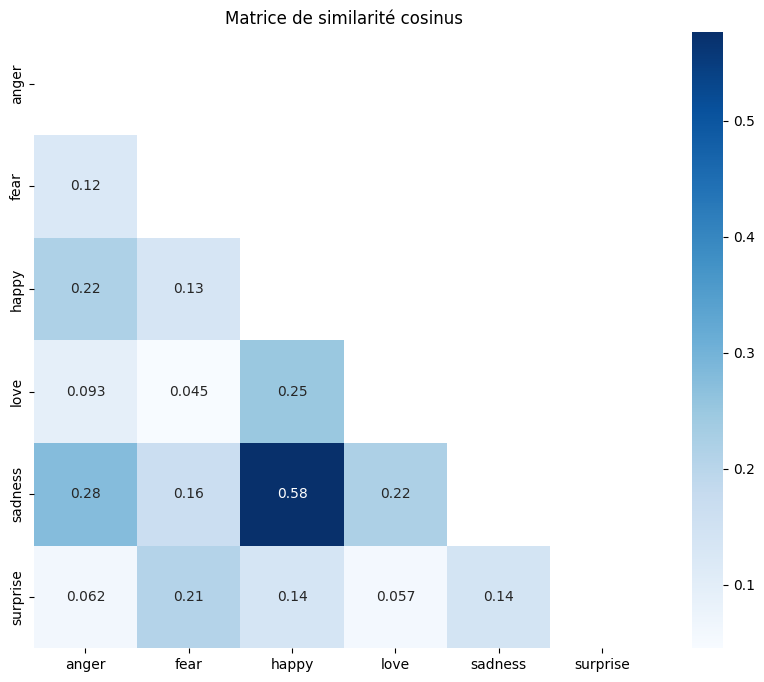

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calculer la matrice de similarité cosinus
similarity_matrix = cosine_similarity(top_words_df.T)

# Créer un DataFrame avec les étiquettes des émotions
similarity_df = pd.DataFrame(similarity_matrix, index=top_words_df.columns, columns=top_words_df.columns)

# Masquer la moitié supérieure de la matrice
mask = np.triu(np.ones_like(similarity_df, dtype=bool))

# Afficher la heatmap
plt.figure(figsize=(10,8))
ax = sns.heatmap(similarity_df, annot=True, cmap='Blues', mask=mask)

# Ajouter un titre
ax.set_title('Matrice de similarité cosinus')

plt.show()


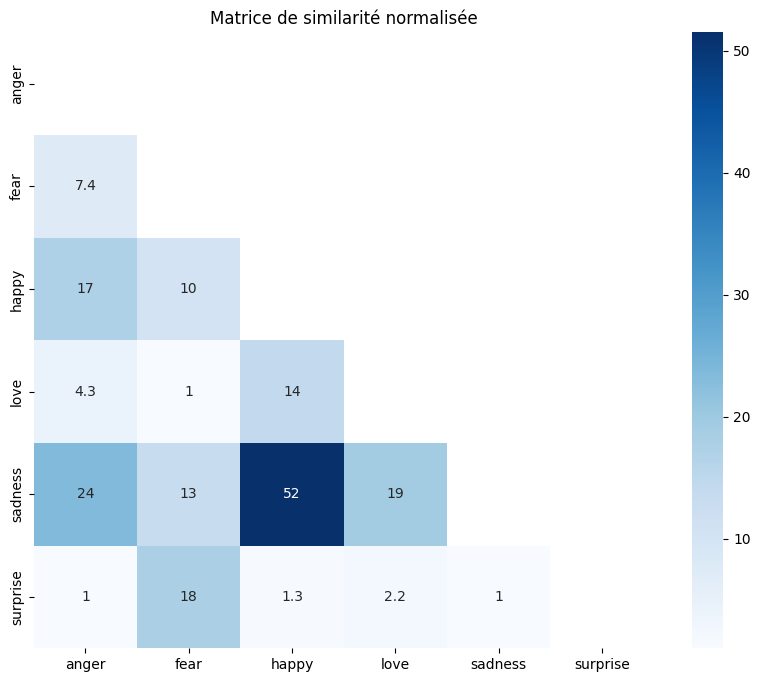

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Normaliser les valeurs de similarité entre 1 et 100
scaler = MinMaxScaler(feature_range=(1, 100))
similarity_matrix = scaler.fit_transform(similarity_matrix)

# Créer un DataFrame avec les étiquettes des émotions
similarity_df = pd.DataFrame(similarity_matrix, index=top_words_df.columns, columns=top_words_df.columns)

# Masquer la moitié supérieure de la matrice
mask = np.triu(np.ones_like(similarity_df, dtype=bool))

# Afficher la heatmap
plt.figure(figsize=(10,8))
ax = sns.heatmap(similarity_df, annot=True, cmap='Blues', mask=mask)

# Ajouter un titre
ax.set_title('Matrice de similarité normalisée')

plt.show()


### 4.1 Tokenisation

In [12]:
# def tokenize(text):
#     doc = nlp(text)
#     tokens = [token.text for token in doc]
#     return tokens

# df['Tokens'] = df['Text'].apply(tokenize)

### 4.2 Gestion de la ponctuation, des émojis et des stopwords

In [13]:
# def filter_tokens(tokens):
#     filtered_tokens = [token for token in tokens if not (nlp.vocab[token].is_punct or nlp.vocab[token].is_stop or len(token) < 3 or token.isnumeric() or token.isspace() or token.lower() in {'feel', 'feeling'})]
#     return filtered_tokens

# df['Filtered_Tokens'] = df['Tokens'].apply(filter_tokens)




In [36]:
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


### 4.3 Lemmatisation

In [15]:
# def lemmatize(tokens):
#     doc = nlp(' '.join(tokens))
#     lemmas = [token.lemma_ for token in doc]
#     return lemmas

# df['Lemmas'] = df['Filtered_Tokens'].apply(lemmatize)



In [16]:
df

,Text,Emotion,Stopwords,Non_Stopwords
0,i didnt feel humiliated,sadness,[did],[humiliated]
1,i can go from feeling so hopeless to so damned...,sadness,"[can, go, from, so, to, so, just, from, being,...","[hopeless, damned, hopeful, cares, awake]"
2,im grabbing a minute to post i feel greedy wrong,anger,[to],"[grabbing, minute, post, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,love,"[am, ever, about, the, will, that, it, is, sti...","[nostalgic, fireplace, property]"
4,i am feeling grouchy,anger,[am],[grouchy]
...,...,...,...,...
21454,Melissa stared at her friend in dism,fear,"[at, her, in]","[Melissa, stared, friend, dism]"
21455,Successive state elections have seen the gover...,fear,"[have, the, by]","[Successive, state, elections, seen, governing..."
21456,Vincent was irritated but not dismay,fear,"[was, but, not]","[Vincent, irritated, dismay]"
21457,Kendall-Hume turned back to face the dismayed ...,fear,"[back, to, the]","[Kendall, Hume, turned, face, dismayed, coup]"


### 4.4 Création des modèles Bag of Words et TF-IDF

In [17]:
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# # Créer un modèle Bag of Words
# bow_vectorizer = CountVectorizer()
# bow_matrix = bow_vectorizer.fit_transform(df['Lemmas'].apply(lambda x: ' '.join(x)))

# # Créer un modèle TF-IDF
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(df['Lemmas'].apply(lambda x: ' '.join(x)))


In [18]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
df = pd.read_csv("Emotion_final.csv")

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    filtered_tokens = [token for token in tokens if not (nlp.vocab[token].is_punct or nlp.vocab[token].is_stop or len(token) < 3 or token.isnumeric() or token.isspace() or token.lower() in {'feel', 'feeling','feelings', 'like','im','really', 'today','didnt','go', 'know', 'get', 'want', 'would', 'time', 'little', 'ive', 'still', 'even', 'one',  'people', 'think', 'bit', 'things', 'much', 'dont', 'make', 'day', 'something', 'back', 'going', 'way', 'could'})]    
    return ' '.join(filtered_tokens)

corpus = df['Text'].tolist()
corpus = [preprocess(text) for text in corpus]

# Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

# TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())


['000' '12' '1997' ... 'zum' 'zumba' 'zzap']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['000' '12' '1997' ... 'zum' 'zumba' 'zzap']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
X

<21459x14784 sparse matrix of type '<class 'numpy.float64'>'
	with 125691 stored elements in Compressed Sparse Row format>

In [33]:
def compter_zeros(matrice):
    compteur = 0
    for ligne in matrice:
        for element in ligne:
            if element == 0:
                compteur += 1
    return compteur
compter_zeros(X.toarray())

317124165

In [19]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = df['Emotion'].values

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = XGBClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.85


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = df['Emotion'].values

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.86


In [30]:
def predict_emotion(text, clf, vectorizer, le):
    text = preprocess(text)
    X = vectorizer.transform([text])
    y_pred = clf.predict(X)
    emotion = le.inverse_transform(y_pred)[0]
    return emotion

text = "angry cat"
emotion = predict_emotion(text, clf, vectorizer, le)
print(f"Emotion: {emotion}")


Emotion: anger


Stocker les données avec Elastic Search

mise en place

→ Démarrer un container à partir de l’image docker.elastic.co/elasticsearch/elasticsearch:7.17.10

    ● en mode détaché -d

    ● monter le volume /usr/share/elasticsearch/data en local

    ● utiliser le mapping de port -p 9200:9200

    ● utiliser la variable -e "discovery.type=single-node"
    
    ● le nom du container sera --name elastic

→ Visualiser les logs du container 
→ appeler la route racine “/”



### les etape que j'ai efectuer 

        docker run -d -v C:\Users\impej\Documents\BRIEF\NLP:/usr/share/elasticsearch/data -p 9200:9200 -e "discovery.type=single-node" --name elastic docker.elastic.co/elasticsearch/elasticsearch:7.17.10


Une fois que le conteneur est démarré, vous pouvez visualiser les logs du conteneur en exécutant la commande suivante:

    - docker logs elastic

Pour vérifier que Elasticsearch fonctionne correctement, vous pouvez appeler la route racine / en exécutant la commande suivante:

    - curl http://localhost:9200/